In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 设置 Matplotlib 和 Seaborn 的样式
plt.style.use('ggplot') # 使用 ggplot 风格，可选
sns.set_theme(style="whitegrid") # 设置 seaborn 主题

In [3]:
# 加载数据
# 尝试从本地加载，如果文件不存在，则从seaborn加载示例数据集
df = pd.read_csv('/home/hmd24/project/TOC_Warning_System/data/processed/TOC_dataset_original.csv')
print("数据加载成功！")

数据加载成功！


In [4]:
# 1. 确保 'timestamp' 列是 datetime 类型，并设置为索引
# 假设您的时间戳列名为 'timestamp'
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
print("数据加载并设置时间戳为索引成功！")

# 2. 初步检查
print("\n--- 2.1 数据集的头部（前5行）---")
print(df.head())

print("\n--- 2.2 数据集的尾部（后5行）---")
print(df.tail())

print("\n--- 2.3 数据集的基本信息（非空值、数据类型）---")
df.info()

print("\n--- 2.4 数据集的统计摘要（数值型特征）---")
print(df.describe())

print("\n--- 2.5 数据集的形状（行数, 列数）---")
print(f"数据集的形状：{df.shape}")

print("\n--- 2.6 每列的缺失值数量 ---")
print(df.isnull().sum())

print("\n--- 2.7 每列缺失值的百分比 ---")
print((df.isnull().sum() / len(df)) * 100)

print("\n--- 2.8 时间戳连续性检查 ---")
time_diff = df.index.to_series().diff()
# 检查时间步长是否一致
print(f"最小时间步长: {time_diff.min()}")
print(f"最大时间步长: {time_diff.max()}")
print(f"平均时间步长: {time_diff.mean()}")

# 如果时间步长不一致，可以找出不连续的点
if not (time_diff.max() == time_diff.min()):
    print("注意：时间戳存在不连续点或非均匀采样。")
    # 进一步找出具体的跳变点：
    # print(time_diff[time_diff != time_diff.mode()[0]]) # 找出和众数时间步长不一样的点

数据加载并设置时间戳为索引成功！

--- 2.1 数据集的头部（前5行）---
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2024-01-27 18:00:00  1.38  31.25  20.42  3.27  1.86      0.55
2024-01-27 19:00:00  1.33  31.25  21.12  3.26  1.87      0.55
2024-01-27 20:00:00  1.27  31.25  20.81  3.25  1.87      0.55
2024-01-27 21:00:00  1.22  31.25  20.49  3.24  1.87      0.55
2024-01-27 22:00:00  1.24  31.25  20.18  3.21  1.88      0.55

--- 2.2 数据集的尾部（后5行）---
                       BD     PW     DI    RO    MD  Endpoint
timestamp                                                    
2025-03-18 11:00:00  3.16  47.47  20.31  4.89  2.02      0.63
2025-03-18 12:00:00  3.18  47.73  18.91  4.78  2.01      0.63
2025-03-18 13:00:00  3.20  48.00  17.51  4.66  2.01      0.63
2025-03-18 14:00:00  3.23  49.25  18.72  4.54  2.00      0.63
2025-03-18 15:00:00  3.25  50.50  19.92  4.43  1.99      0.63

--- 2.3 数据集的基本信息（非空值、数据类型）---
<class 'pandas.core.frame.DataFrame'


--- 3.1 时序数据可视化 (线图) ---


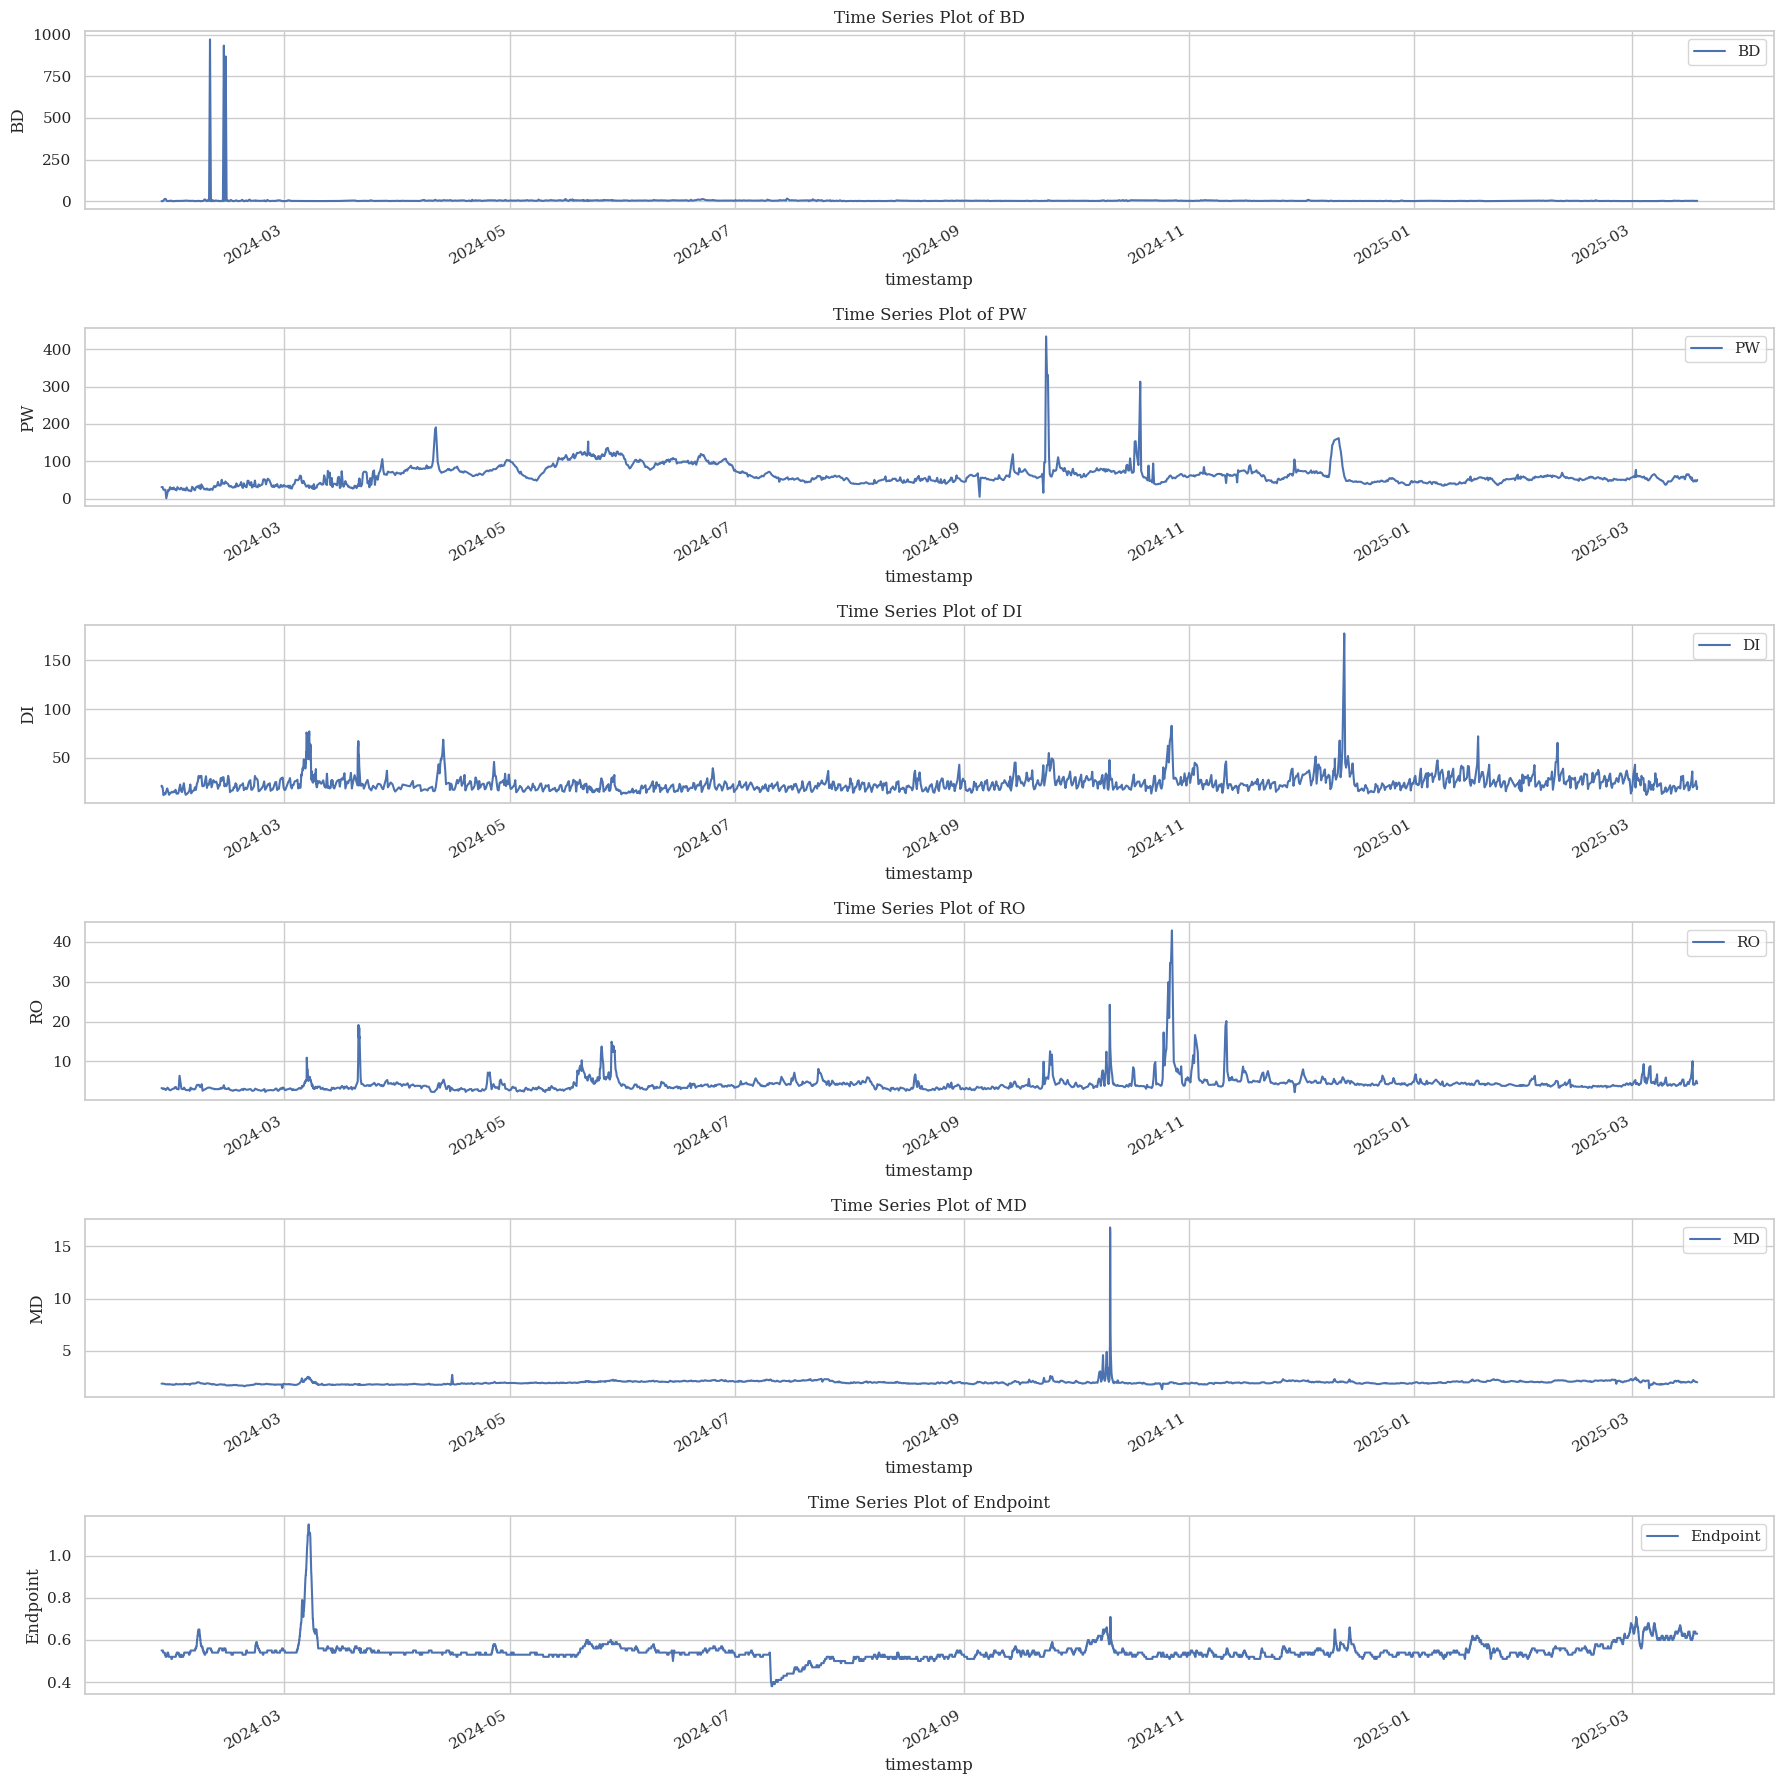


--- 3.2 单变量分布分析 (直方图和箱线图) ---


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_266339/388786682.py:93: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_266339/388786682.py:93: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_266339/388786682.py:93: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_266339/388786682.py:93: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_266339/388786682.py:93: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_266339/388786682.py:93: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  plt.tight_layout()
find

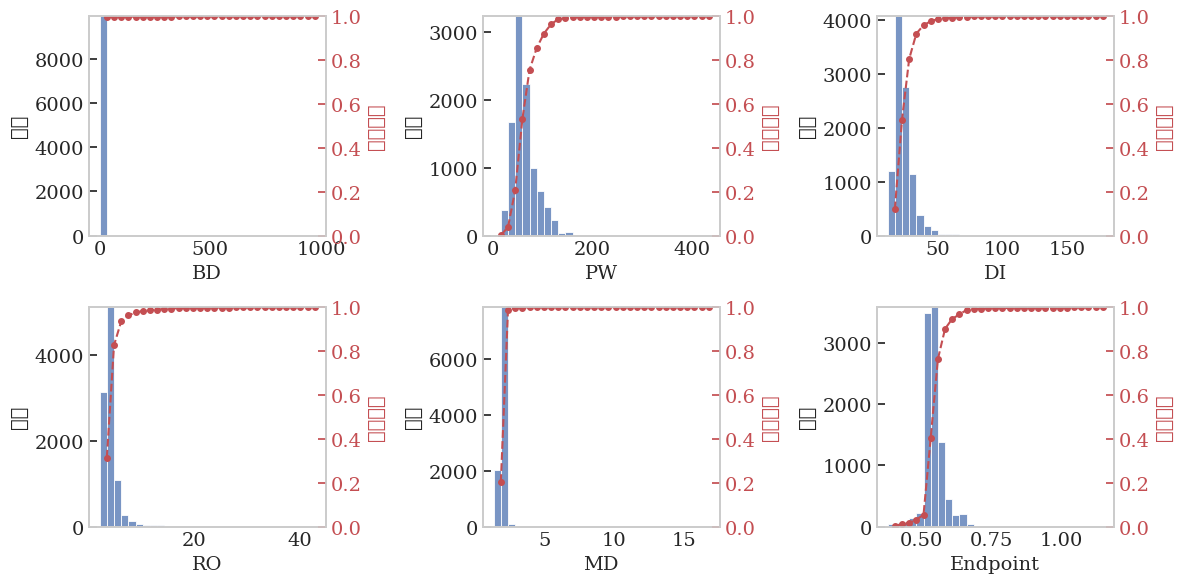

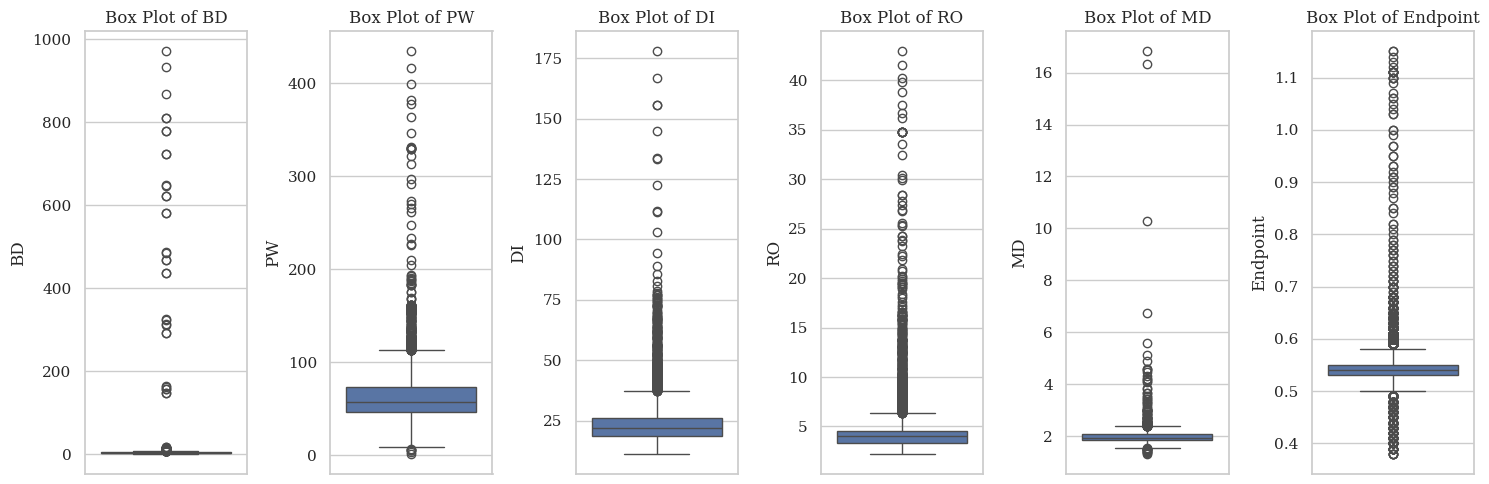

In [5]:
print("\n--- 3.1 时序数据可视化 (线图) ---")

# --- 1. 全局字体和负号设置 ---
plt.rcParams['font.family'] = 'serif'

# 【英文备选字体列表】
# 依次尝试 Times New Roman, 然后是 DejaVu Serif
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif'] 

# 【中文备选字体列表】
# 依次尝试 SimHei, macOS的"黑体-简", Google的"思源黑体", "文泉驿微米黑"
plt.rcParams['font.sans-serif'] = ['Heiti SC', 'Noto Sans CJK SC', 'WenQuanYi Micro Hei']

# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False

# 确保这里的数值列与您的实际数据列名匹配
numerical_cols_for_plot = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

plt.figure(figsize=(18, len(numerical_cols_for_plot) * 3)) # 根据列数调整图高
for i, col in enumerate(numerical_cols_for_plot):
    plt.subplot(len(numerical_cols_for_plot), 1, i + 1)
    df[col].plot(title=f'Time Series Plot of {col}', legend=True)
    plt.ylabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()


print("\n--- 3.2 单变量分布分析 (直方图和箱线图) ---")
# 这里的数值列通常是连续的，如果 Endpint 是离散的，可以单独分析
numerical_cols_for_dist = ['BD', 'PW', 'DI', 'RO', 'MD', 'Endpoint']

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols_for_dist):
#     plt.subplot(2, 3, i + 1) # 2行3列布局
#     sns.histplot(df[col], kde=False, bins=30)
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

# --- 开始绘图 ---
# 加大字号
fontsize = 14
# 定义bins数量
bins_count = 30

plt.figure(figsize=(12, 6)) 

for i, col in enumerate(numerical_cols_for_dist):
    ax = plt.subplot(2, 3, i + 1)
    
    # 创建共享X轴的右侧Y轴
    ax2 = ax.twinx()

    # 在左轴(ax)上绘制频数直方图
    sns.histplot(data=df, x=col, bins=bins_count, kde=False, ax=ax)

    # --- 2. 左纵轴完全顶格 ---
    # 获取所有柱子的高度并找到最大值
    max_freq = 0
    if ax.patches: # 检查是否有柱子被绘制
        max_freq = max(p.get_height() for p in ax.patches)
    # 设置Y轴范围，上限精确到最高柱子的高度
    ax.set_ylim(bottom=0, top=max_freq)

    # 计算并在右轴(ax2)上绘制累积概率曲线
    counts, bin_edges = np.histogram(df[col], bins=bins_count)
    cumulative_prob = np.cumsum(counts) / counts.sum()
    ax2.plot(bin_edges[1:], cumulative_prob, color='r', linestyle='--', marker='o', ms=4, label='累积概率')

    # --- 样式调整 ---
    ax.grid(False)
    ax2.grid(False)
    
    ax2.set_ylim(0, 1) # 右轴顶格

    # 主副刻度朝内
    ax.tick_params(direction='in', which='both', labelsize=fontsize)
    ax2.tick_params(direction='in', which='both', colors='r', labelcolor='r', labelsize=fontsize)
    ax.xaxis.set_tick_params(direction='in', which='both')
    
    # --- 3. 字体应用 ---
    # X轴标签和刻度将自动使用默认的 Times New Roman
    ax.set_xlabel(col, fontsize=fontsize)
    
    # Y轴标签需要指定中文字体
    ax.set_ylabel('频数', fontfamily='SimHei', fontsize=fontsize)
    ax2.set_ylabel('累积概率', fontfamily='SimHei', fontsize=fontsize, color='r')


plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(1, 6, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()